In [28]:
import matplotlib.pyplot as plt
import matplotlib
# %matplotlib qt

import numpy as np
from numpy import *
from scipy.fft import fft, ifft, fftshift, ifftshift
from scipy.optimize import curve_fit

import os
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib
import numpy as np
from scipy.optimize import curve_fit

# PSD model: 1/f + 1/f^2 + white noise
def psd_full(f, A1, A2, C):
    return A1 / f + A2 / f**2 + C

# Fitting function
def get_full_fit(x_data, y_data):
    valid = (x_data > 0) & (y_data > 0) & np.isfinite(y_data)
    x_clean = x_data[valid]
    y_clean = y_data[valid]
    params, pcov = curve_fit(psd_full, x_clean, y_clean, maxfev=10000)
    A1, A2, C = params
    a1_err = np.sqrt(pcov[0, 0])
    return A1, A2, C, x_clean, y_clean, a1_err


In [95]:
initial_folder = r'C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\TWPA_noise_9\Best_noise_power_sweep'

folders = os.listdir(initial_folder)
for i in range(len(folders)):
    if ".fig" in folders[i]: pass
    else: 
        print(r"[%d]" %(i), '----------->', folders[i])

[0] -----------> Noise_sweep_10_100_501_2.374_9.205_2025-08-03-10-58-10.mat
[1] -----------> Noise_sweep_10_200_501_1.375_10.71_2025-08-03-03-32-11.mat
[2] -----------> Noise_sweep_10_200_501_1.575_9.225_2025-08-03-05-32-27.mat
[3] -----------> Noise_sweep_10_200_501_1.62_9.189_2025-08-02-23-31-49.mat
[4] -----------> Noise_sweep_10_200_501_1.6_9.144_2025-08-03-01-31-59.mat
[5] -----------> Noise_sweep_10_200_501_2.325_9.162_2025-08-03-07-32-39.mat
[6] -----------> Noise_sweep_10_200_501_2.375_9.207_2025-08-03-09-32-55.mat
[7] -----------> Noise_sweep_10_20_201_2.374_9.205_2025-08-03-21-27-58.mat
[8] -----------> Noise_sweep_20_20_201_2.374_9.205_2025-08-03-21-48-25.mat
[9] -----------> Noise_sweep_good_10_20_201_2.374_9.205_2025-08-04-00-24-35.mat


In [78]:
file = folders[0]
mat = sio.loadmat(initial_folder+"\\"+file)
print(mat.keys(), '\n')

data_gain = mat['data_gain']
print(data_gain.shape)
volts = mat['volts'][0]
print('DC:', volts.shape)
pump_freqs = mat['pump_freqs'][0]
print('pf:', pump_freqs.shape)
pump_powers = mat['pump_powers'][0]#-70
print('pp', pump_powers.shape)
fft_freq = mat['fft_freq'][0]
print('fft_freq:', fft_freq.shape)


data_mag = mat['data_mag']/len(fft_freq)/20*2 # on/off
print(data_mag.shape)
data_pha = mat['data_pha']/len(fft_freq)/20*2 # on/off
print(data_pha.shape)


dict_keys(['__header__', '__version__', '__globals__', 'pump_powers', 'pump_freqs', 'volts', 'data_gain', 'data_mag', 'data_pha', 'fft_freq']) 

(3, 3, 10)
DC: (3,)
pf: (3,)
pp (10,)
fft_freq: (501,)
(3, 3, 10, 2, 501)
(3, 3, 10, 2, 501)


In [79]:
data_pha_ref = data_pha[0,0,:,1]
data_pha_mea = data_pha[0,0,:,0]
print(data_pha_mea.shape)
data_mag_ref = data_mag[0,0,:,1]
data_mag_mea = data_mag[0,0,:,0]

data_gain = data_gain[0,0,:]

(10, 501)


dict_keys(['__header__', '__version__', '__globals__', 'pump_powers', 'pump_freqs', 'volts', 'data_gain', 'data_mag', 'data_pha', 'fft_freq']) 

(4, 3, 10)
DC: (4,)
pf: (3,)
pp (10,)
fft_freq: (501,)
(4, 3, 10, 2, 501)
(4, 3, 10, 2, 501)
(10, 501)


C:\Users\Demag\AppData\Local\Temp\ipykernel_39504\3991284632.py:107: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  a.set_xlim(left=0, right=fft_freq[-1])


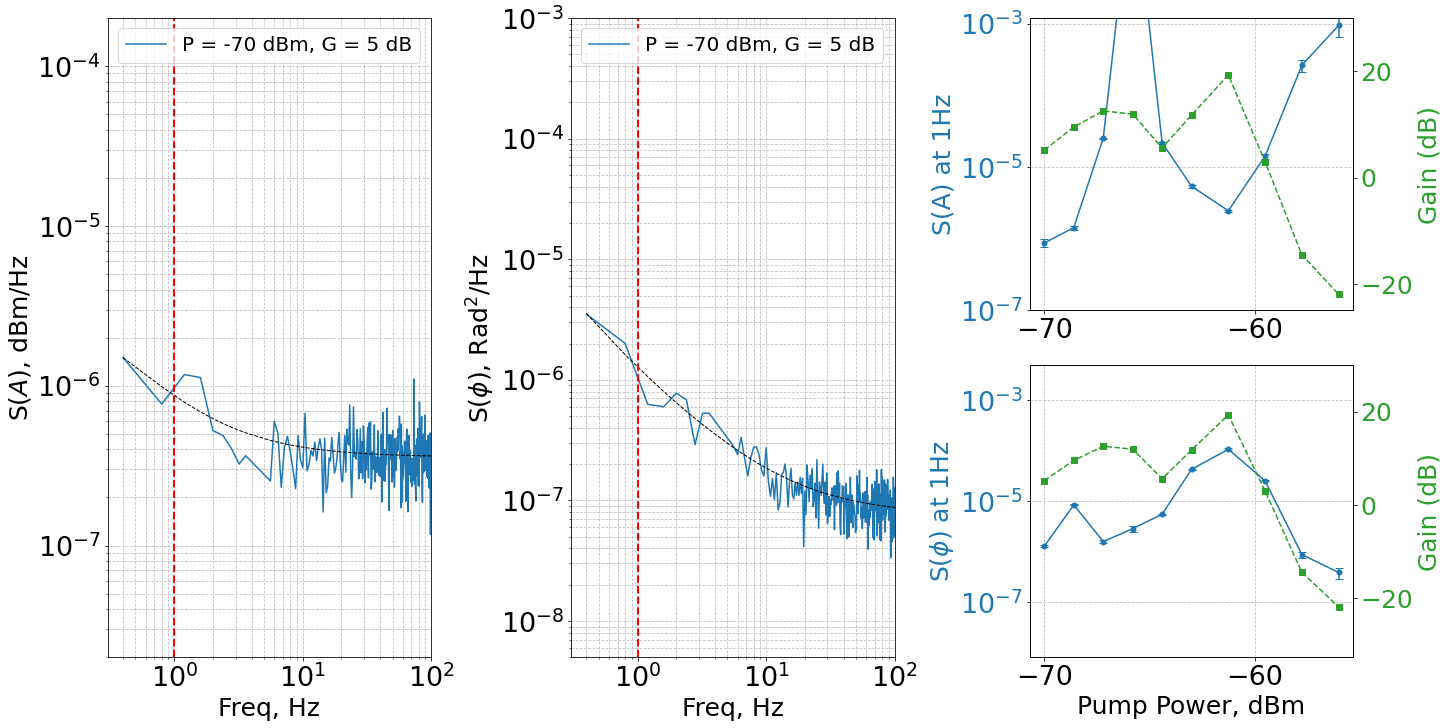

In [142]:
for iik in range(1):
    for iij in range(1):
        file = folders[2]
        mat = sio.loadmat(initial_folder+"\\"+file)
        print(mat.keys(), '\n')

        data_gain = mat['data_gain']
        print(data_gain.shape)
        volts = mat['volts'][0]
        print('DC:', volts.shape)
        pump_freqs = mat['pump_freqs'][0]
        print('pf:', pump_freqs.shape)
        pump_powers = mat['pump_powers'][0]#-70
        print('pp', pump_powers.shape)
        fft_freq = mat['fft_freq'][0]
        print('fft_freq:', fft_freq.shape)


        data_mag = mat['data_mag']/len(fft_freq)/20*2 # on/off
        print(data_mag.shape)
        data_pha = mat['data_pha']/len(fft_freq)/20*2 # on/off
        print(data_pha.shape)
        
        data_pha_ref = data_pha[iik,iij,:,1]
        data_pha_mea = data_pha[iik,iij,:,0]
        print(data_pha_mea.shape)
        data_mag_ref = data_mag[iik,iij,:,1]
        data_mag_mea = data_mag[iik,iij,:,0]

        data_gain = data_gain[iik,iij,:]

        
        # Set font
        font = {'size': 25}
        matplotlib.rc('font', **font)

        # Plot layout
        fig = plt.figure(figsize=(20, 10), constrained_layout=True)
        gs = gridspec.GridSpec(2, 3, figure=fig)
        ax0 = fig.add_subplot(gs[0:2, 0])
        ax1 = fig.add_subplot(gs[0:2, 1])
        ax2 = fig.add_subplot(gs[0, 2])
        ax3 = fig.add_subplot(gs[1, 2])
        ax0.set_xscale('log', base=10)
        ax0.set_yscale('log', base=10)
        ax1.set_xscale('log', base=10)
        ax1.set_yscale('log', base=10)
        ax2.set_yscale('log', base=10)
        ax3.set_yscale('log', base=10)
        for ax in [ax0, ax1, ax2, ax3]:
            ax.grid(True, which="both", ls="--", alpha=0.8)
            ax.tick_params(labelsize=27)

        # Results
        a_pha = np.array([])
        a_mag = np.array([])
        a_pha_err = np.array([])
        a_mag_err = np.array([])

        mask = np.ones(data_pha_mea[0].shape[0], dtype=bool)
        mask[int(len(fft_freq)/2)+10:int(len(fft_freq)/2)+14] = False
        fft_freq = fft_freq[mask]
        
        idx_set = [0, 15, 19]
        # Fit loop
        for i in range(len(pump_powers)):
            
            pha_curr = data_pha_mea[i][mask]
            mag_curr = data_mag_mea[i][mask]


            try:
                A1, A2, C, xc_full, yc_full, a_err = get_full_fit(fft_freq[:], pha_curr[:])
                if i in idx_set:
                    ax0.plot(xc_full, yc_full, '-', markersize=2, label=f'P = {int(pump_powers[i]-70)} dBm, G = {int(data_gain[i])} dB')
                A1, A2, C, xc, yc, a_err = get_full_fit(fft_freq[:], pha_curr[:])
                y_fit = psd_full(xc_full, A1, A2, C)
                if i in idx_set:
                    ax0.plot(xc_full, y_fit, 'k--', linewidth=1)
                a_pha = np.append(a_pha, psd_full(1, A1, A2, C))
                a_pha_err = np.append(a_pha_err, a_err)
            except Exception as e:
                print(f"Phase fit failed at i={i}: {e}")

            try:
                A1, A2, C, xc_full, yc_full, a_err = get_full_fit(fft_freq[:], mag_curr[:])
                if i in idx_set:
                    ax1.plot(xc_full, yc_full, '-', markersize=2, label=f'P = {int(pump_powers[i]-70)} dBm, G = {int(data_gain[i])} dB')
                A1, A2, C, xc, yc, a_err = get_full_fit(fft_freq[:], mag_curr[:])
                y_fit = psd_full(xc_full, A1, A2, C)
                if i in idx_set:
                    ax1.plot(xc_full, y_fit, 'k--', linewidth=1)
                a_mag = np.append(a_mag, psd_full(1, A1, A2, C))
                a_mag_err = np.append(a_mag_err, a_err)
            except Exception as e:
                print(f"Magnitude fit failed at i={i}: {e}")



        # Error bar plots at 1 Hz
        if len(a_pha) > 0:
            ax2.errorbar(pump_powers[:len(a_pha)]-70, a_pha, yerr=a_pha_err, fmt='o-', markersize=5, capsize=4)
        if len(a_mag) > 0:
            ax3.errorbar(pump_powers[:len(a_mag)]-70, a_mag, yerr=a_mag_err, fmt='o-', markersize=5, capsize=4)
        for a in [ax0, ax1]:
            a.axvline(1, color='red', linestyle='--', linewidth=2)
            a.set_xlim(left=0, right=fft_freq[-1])


        # Twin axis for gain
        ax2_gain = ax2.twinx()
        ax2_gain.plot(pump_powers[:len(a_pha)]-70, data_gain[:len(a_pha)], 's--', color='tab:green')
        ax2_gain.set_ylabel('Gain (dB)', color='tab:green')
        ax2_gain.tick_params(axis='y', labelcolor='tab:green', labelsize=25)
        ax3_gain = ax3.twinx()
        ax3_gain.plot(pump_powers[:len(a_pha)]-70, data_gain[:len(a_pha)], 's--', color='tab:green')
        ax3_gain.set_ylabel('Gain (dB)', color='tab:green')
        ax3_gain.tick_params(axis='y', labelcolor='tab:green', labelsize=25)

        # Labels
        ax0.set_ylabel('S($A$), dBm/Hz')
        ax1.set_ylabel(r'S($\phi$), Rad$^2$/Hz')
        ax0.set_xlabel('Freq, Hz')
        ax1.set_xlabel('Freq, Hz')
        ax2.set_ylabel('S(A) at 1Hz', color='tab:blue')
        ax2.tick_params(axis='y', labelcolor='tab:blue')
        ax3.set_ylabel(r'S($\phi$) at 1Hz', color='tab:blue')
        ax3.tick_params(axis='y', labelcolor='tab:blue')
        ax3.set_xlabel('Pump Power, dBm')
        ax0.legend(loc = 2, fontsize=20)
        ax1.legend(loc = 2, fontsize=20)

        ax0.set_ylim(2e-8, 2e-4)
        ax1.set_ylim(5e-9, 1e-3)
        ax2.set_ylim(1e-7, 1.2e-3)
        ax3.set_ylim(8e-9, 5e-3)

        

        ax2_gain.set_ylim(-25, 30)
        ax3_gain.set_ylim(-32.8, 30)


        # Save and display
#         plt.savefig(r"C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\TWPA_noise_9\paper_plots\Power_sweep_fina.png", dpi=300, bbox_inches='tight')
        plt.show()
